In [49]:
## 데이터 만들고 Kmeans 실습
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X,y = make_blobs(n_samples= 1000,
                 n_features=2,
                 centers=6,
                 random_state=10)

print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [59]:
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters=6,
             init='random',
             n_init=10,
             max_iter=100,
             random_state=0)

kmc.fit(X)
label_kmc = kmc.labels_
print(label_kmc)

[4 1 4 4 0 2 4 2 1 0 1 0 1 3 1 0 2 4 2 0 0 3 1 4 3 3 0 5 1 4 2 1 1 0 4 3 5
 4 5 4 1 4 3 1 2 5 2 4 0 3 1 0 1 2 2 0 1 3 3 0 3 2 1 4 3 1 2 0 3 3 3 3 2 3
 1 2 5 5 3 5 5 3 1 1 4 3 3 5 5 4 4 1 0 4 3 0 2 1 1 4 1 0 5 5 0 2 1 4 5 5 5
 0 0 0 0 0 1 4 0 5 0 4 5 3 3 5 0 5 2 4 0 5 1 2 1 1 5 0 2 4 5 4 1 5 3 3 2 1
 1 5 3 1 2 5 2 1 1 0 2 3 4 1 5 5 5 5 1 2 4 5 1 5 1 1 3 3 3 0 2 3 5 5 2 5 0
 3 5 5 1 4 0 2 2 4 4 0 3 3 2 1 0 1 4 1 4 3 2 1 4 1 2 0 0 5 0 4 5 3 3 4 3 1
 1 0 1 2 0 0 1 3 5 3 4 5 4 1 3 1 2 0 1 0 2 5 5 4 0 0 4 5 0 5 0 4 3 0 3 0 3
 2 3 5 3 5 1 3 4 4 0 5 3 5 3 3 2 2 5 4 2 0 1 0 4 0 2 4 4 0 0 2 5 3 5 1 5 0
 4 4 3 3 2 2 0 2 4 3 1 4 1 5 3 4 0 2 5 4 2 3 2 2 0 0 1 4 2 0 5 2 0 1 1 0 4
 4 0 3 5 4 1 1 2 5 2 3 4 2 1 5 4 2 3 0 2 0 4 0 1 0 2 3 1 3 0 5 3 1 0 1 0 0
 2 3 5 4 1 3 1 2 4 1 1 4 2 3 0 3 4 4 5 3 4 3 1 0 4 5 1 5 2 0 4 0 0 4 3 3 4
 5 2 4 0 2 1 4 5 0 1 4 2 1 4 3 4 2 1 1 1 0 1 1 3 4 0 0 3 1 3 0 2 0 0 5 3 2
 4 0 4 2 5 4 4 1 3 2 4 2 0 5 4 4 3 3 3 2 1 0 0 5 5 5 0 2 1 3 5 4 1 0 2 1 5
 2 5 0 3 1 0 2 1 3 2 4 5 

In [60]:
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc

X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-6.106437,-8.196673,4,4
1,2.728335,9.344270,5,1
2,-7.056682,-8.009963,4,4
3,-6.984550,-9.664570,4,4
4,7.328717,-9.305356,0,0


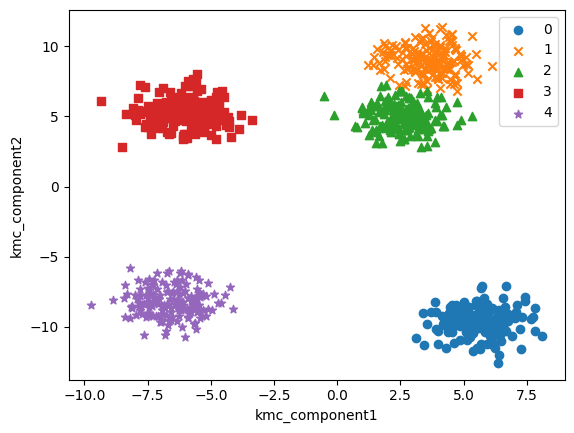

In [61]:
df = X_kmc_df
markers = ['o','x','^','s','*']

for i,mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i["kmc_comp2"]

    plt.scatter(X1, X2, marker=mark,
                label = target_i)

plt.xlabel("kmc_component1")
plt.ylabel("kmc_component2")
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X,label_kmc)

print(sil_score)

0.7052457300878319


In [78]:
## dbscan data 

from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,
                 noise=0.001,
                 random_state=0)

In [112]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.1)
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0
 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1
 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1
 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1
 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 

In [113]:
dbs_columns = ['dbs_comp1','dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)

X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs
X_dbs_df.head(5)

,dbs_comp1,dbs_comp2,target,label_dbs
0,1.999721,0.462793,1,0
1,1.636907,-0.270243,1,0
2,-0.300255,0.951844,0,1
3,0.053623,0.172557,1,0
4,0.530681,-0.383463,1,0


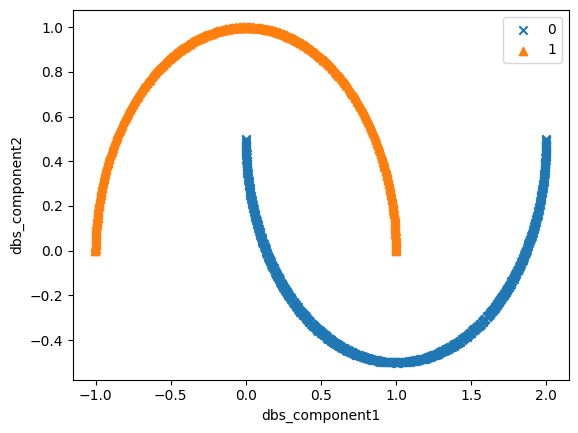

In [114]:
df = X_dbs_df
markers = ["x","^"]

for i,mark in enumerate(markers):
    df_i = df[df['label_dbs']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']

    plt.scatter(X1,X2, marker=mark, label=target_i)

plt.xlabel("dbs_component1")
plt.ylabel("dbs_component2")
plt.legend()
plt.show()

In [105]:
sil_score = silhouette_score(X, label_dbs)
print(sil_score)

0.33800690515973025


In [127]:
## Gausian Mixture
X,y = make_blobs(n_samples= 1000,
                 n_features=2,
                 centers=2,
                 random_state=10)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2,
                      random_state=0)
gmm.fit(X)
label_gmm = gmm.predict(X)
print(label_gmm)

[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0
 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0
 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1
 1 0 1 0 0 0 1 1 0 0 0 0 

In [128]:
gmm_columns = ['gmm_comp1','gmm_comp2']
X_gmm_df = pd.DataFrame(X,columns=gmm_columns)
X_gmm_df['target']=y
X_gmm_df["label_gmm"] = label_gmm
X_gmm_df.head(5)

,gmm_comp1,gmm_comp2,target,label_gmm
0,5.804166,-7.970553,0,0
1,5.053997,-10.552287,0,0
2,5.103212,-8.920815,0,0
3,3.026158,5.144408,1,1
4,3.255860,5.589971,1,1


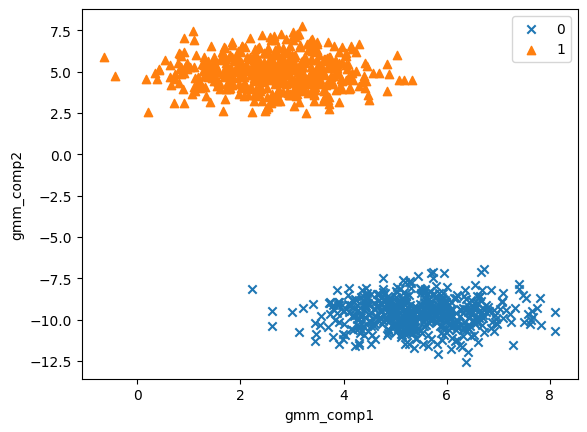

In [129]:
df = X_gmm_df
markers = ["x","^"]

for i,mark in enumerate(markers) :
    df_i = df[df['label_gmm']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']

    plt.scatter(X1,X2,
                marker=mark,
                label = target_i)

plt.xlabel('gmm_comp1')
plt.ylabel("gmm_comp2")
plt.legend()
plt.show()

In [130]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X,label_gmm)
print(sil_score)

0.8844423238063401
